In [ ]:
pip install bnlp

In [ ]:
pip install bangla_stemmer

## Importing the libraries

In [ ]:
import pandas as pd
#from bnlp import BasicTokenizer
from bangla_stemmer.stemmer import stemmer
import numpy as np
import nltk
#nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
import re
from bangla_stemmer.stemmer import stemmer

## Reading the dataset

In [ ]:
df=pd.read_csv('reviews.csv')
df.head()

,Statement,Output
0,Dolph Lundgren stars as a templar who comes to...,Positive
1,"আমার জীবনে দেখা, সেরা একটি নাটক। নাটকটি দেখেছ...",Positive
2,"##অমি"" ভাইকে অনেক ধন্যবাদ, কারন সম্পুর্ন ডিফর...",Positive
3,A major disappointment. This was one of the be...,Positive
4,"बैनर :\nप्रकाश झा प्रोडक्शन्स, इरोज इंटरनेशनल ...",Positive


## Stopword set and suffixes for stemming Hindi language

In [ ]:
suffixes = {
    1: [u"ो",u"े",u"ू",u"ु",u"ी",u"ि",u"ा"],
    2: [u"कर",u"ाओ",u"िए",u"ाई",u"ाए",u"ने",u"नी",u"ना",u"ते",u"ीं",u"ती",u"ता",u"ाँ",u"ां",u"ों",u"ें"],
    3: [u"ाकर",u"ाइए",u"ाईं",u"ाया",u"ेगी",u"ेगा",u"ोगी",u"ोगे",u"ाने",u"ाना",u"ाते",u"ाती",u"ाता",u"तीं",u"ाओं",u"ाएं",u"ुओं",u"ुएं",u"ुआं"],
    4: [u"ाएगी",u"ाएगा",u"ाओगी",u"ाओगे",u"एंगी",u"ेंगी",u"एंगे",u"ेंगे",u"ूंगी",u"ूंगा",u"ातीं",u"नाओं",u"नाएं",u"ताओं",u"ताएं",u"ियाँ",u"ियों",u"ियां"],
    5: [u"ाएंगी",u"ाएंगे",u"ाऊंगी",u"ाऊंगा",u"ाइयाँ",u"ाइयों",u"ाइयां"],
}

stop_hin = ["हें","है","हैं","हि","ही","हो","हे","से","अत","के","रहे","का","की","कि","तो","ने","एक","नहीं","पे","में","वाले","सकते","वह","वे",
         "कई","होती","आप","यह","और","एवं","को","मे","दो","थे","यदि","उनके","थी","पर","इस","साथ","लिए","जो","होता","या","लिये","द्वारा", 
         "हुई","जब","होते","व","न","उनकी","आदि","सकता","उनका","इतयादि","इतना","जिस","उस","कैसे","हूँ","ना","कहि","सम","र्","कहँ",
         "बस","अपना","यही","कहीं","हाँ","मैंने","जहँ","सब","यह","था","तुम","ये","जे","भी","हम","अब","ऐसे","वहाँ","क्या","ओर","इसी",
         "सके","कभी","हर","मेरी","कम","सा","उन्हें","मेरे","उन","कुछ","इन","ऐसा","जहा","तीन"]

stop = set(stopwords.words('english')).union(stopwords.words('bengali')).union(stop_hin)

## Preprocessing

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the punctutaions
def remove_punctuations(text):
    punc = '''!()-[]{};:'"\’,<>./?@#$%^&*_~|।'''
    for ele in text:
        if ele in punc:
            text = text.replace(ele, "")
    return text

#Stemming the text
def simple_stemmer(text):
    stems = []
    for word in text.split():
        for i in range(1,5): 
            if len(word) >= i + 1:
                for suffix in suffixes[i]:
                    if word.endswith(suffix):
                        word=word[:-i]        #stripping the suffix from the word
        if word:
            stems.append(word)
  
    text = " ".join(stems)
    
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    
    stmr = stemmer.BanglaStemmer()
    s=[]
    for t in text.split(' '):
        s.append(stmr.stem(t))
    stm = ' '.join(s)
    
    
    return stm


In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
stemmer 
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
df['Statement']=df['Statement'].apply(strip_html)
df['Statement']=df['Statement'].apply(remove_between_square_brackets)
df['Statement']=df['Statement'].apply(remove_punctuations)
#df['Statement']=df['Statement'].apply(simple_stemmer)

In [ ]:
df.head()

,Statement,Output
0,Dolph Lundgren stars as a templar who comes to...,Positive
1,আমার জীবনে দেখা সেরা একটি নাটক নাটকটি দেখেছি ...,Positive
2,অমি ভাইকে অনেক ধন্যবাদ কারন সম্পুর্ন ডিফরেন্ট...,Positive
3,A major disappointment This was one of the bes...,Positive
4,बैनर \nप्रकाश झा प्रोडक्शन्स इरोज इंटरनेशनल मी...,Positive


In [ ]:
df['Statement']=df['Statement'].apply(remove_stopwords)
df.head(10)

,Statement,Output
0,Dolph Lundgren stars templar comes New York ke...,Positive
1,জীবনে সেরা নাটক নাটকটি দেখেছি কেঁদেছি কিছুটা জ...,Positive
2,অমি ভাইকে ধন্যবাদ কারন সম্পুর্ন ডিফরেন্ট একটা ...,Positive
3,major disappointment one best UK crime drama d...,Positive
4,बैनर प्रकाश झा प्रोडक्शन्स इरोज इंटरनेशनल मीडि...,Positive
5,একটা ভালো নাটক দেখলাম,Positive
6,Saw Saturday night Provincetown Film Festival ...,Negative
7,show pretty good stories bad dialog main chara...,Positive
8,Worst Movie EverWhat purpose filming remake as...,Positive
9,Dreadful stupidly inane film dealing corruptio...,Positive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes 
import sklearn.metrics as metrics

# LSTM

In [ ]:
# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense

In [ ]:
num_classes = 2

embed_num_dims = 300

max_seq_len = 500

class_names = ['Positive', 'Negative']

In [ ]:
X=df.Statement
Y=df.Output
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=80)


In [ ]:
from nltk.tokenize import word_tokenize

def clean_text(data):
    
    # remove hashtags and @usernames
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    
    # tekenization using nltk
    data = word_tokenize(data)
    
    return data

In [ ]:
import nltk
nltk.download('punkt')
texts = [' '.join(clean_text(text)) for text in df.Statement]

texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]
print(texts_train[1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Liked Stanley Iris much Acting good Story unique interesting arrangement absence violence porno sex refreshing Characters convincing felt like could understand feelings enjoyable movie


In [ ]:
texts_train = [' '.join(text) for text in X_train]
texts_test = [' '.join(text) for text in X_test]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.Statement)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

index_of_words = tokenizer.word_index

# vocab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 115778


In [ ]:
X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len )

X_train_pad

array([[     0,      0,      0, ...,      0,    268,     20],
       [     0,      0,      0, ...,   1665,    773,      1],
       [     0,      0,      0, ...,   4525,    678,   3454],
       ...,
       [     0,      0,      0, ...,     22,    485, 115183],
       [     0,      0,      0, ...,      4,  25449,  69160],
       [     0,      0,      0, ...,      2,  18020,    703]], dtype=int32)

In [ ]:
encoding = {
    'Positive': 0,
    'Negative': 1
}

# Integer labels
y_train = [encoding[x] for x in Y_train]
y_test = [encoding[x] for x in Y_test]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [ ]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    # print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip','wiki-news-300d-1M.vec.zip')
    # print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r') as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')

done.


In [ ]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(115779, 300)

In [ ]:
# Embedding layer before the actaul LSTM 
embedd_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = max_seq_len,
                         weights = [embedd_matrix],
                         trainable=False)

In [ ]:
# Parameters
gru_output_size = 128
bidirectional = True

# Embedding Layer, LSTM or biLSTM, Dense, softmax
model = Sequential()
model.add(embedd_layer)
model.add(GRU(units=gru_output_size,
              dropout=0.2, 
              recurrent_dropout=0.2))

model.add(Dense(num_classes, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 300)          34733700  
                                                                 
 gru (GRU)                   (None, 128)               165120    
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 34,899,078
Trainable params: 165,378
Non-trainable params: 34,733,700
_________________________________________________________________


In [ ]:
batch_size = 64
epochs = 15

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/15
229/229 [==============================] - 592s 3s/step - loss: 0.6175 - accuracy: 0.6292 - val_loss: 0.5333 - val_accuracy: 0.6872
Epoch 2/15
229/229 [==============================] - 613s 3s/step - loss: 0.5243 - accuracy: 0.7050 - val_loss: 0.5077 - val_accuracy: 0.7056
Epoch 3/15
229/229 [==============================] - 644s 3s/step - loss: 0.4950 - accuracy: 0.7216 - val_loss: 0.5076 - val_accuracy: 0.7099
Epoch 4/15
229/229 [==============================] - 597s 3s/step - loss: 0.4763 - accuracy: 0.7260 - val_loss: 0.4958 - val_accuracy: 0.7277
Epoch 5/15
229/229 [==============================] - 614s 3s/step - loss: 0.4704 - accuracy: 0.7340 - val_loss: 0.4874 - val_accuracy: 0.7204
Epoch 6/15
229/229 [==============================] - 645s 3s/step - loss: 0.4534 - accuracy: 0.7487 - val_loss: 0.4917 - val_accuracy: 0.7161
Epoch 7/15
229/229 [==============================] - 587s 3s/step - loss: 0.4445 - accuracy: 0.7498 - val_loss: 0.4858 - val_accuracy: 0.7226

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/sentiment-analyzer/models/lstm_model.h5')

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(Y_test, predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(Y_test, predictions, average='micro') * 100))

Accuracy: 73.86%

F1 Score: 73.86


In [ ]:
print('Message: {}\nPredicted: {}'.format(X_test[3], predictions[3]))

Message: major disappointment one best UK crime drama detective shows 90s developed fascinating title character played Scotlands Robbie Coltrane However oneoff little add perhaps suffers inevitable let due raised expectations favored show returns long hiatus Coltrane isnt really given much much attention spent uninteresting killer act seems uninvolved almost bored exsoldiers story written books attempt update us Coltranes family life seems lightweight Perhaps writers whole series front instead one twohour show would written much depth skip watch old Cracker 90s far far superior
Predicted: Negative


In [ ]:
print(X_test,predictions)

15658                         নিশো ধরনের চরিত্র ভালো অভিনয়
233                                    घटनाओं प्रभाव देखते
7140                  অসাধারণ একটা নাটক ধন্যবাদ আরিয়ান ভাই
2270     Kennel Murder Case starts run doesnt stop end ...
15987    People like tear movie apart realistic Plot so...
                               ...                        
13345    চমৎকার নাটক নিশো বস এন্ড তানজিন তিশা বেষ্ট জুট...
8399           ছোট বেলায় পাকনা মেয়েটা রবীন্দ্রনাতের বই পড়ে
4413              ঠাস গালে চর বসিয়ে দিলে এসব মেয়েকে বেহায়া
10922    absolutely LOVE movie would really like someda...
11250    निर्माता भरत शाह निर्देशक पूजा जतिंदर बेदी संग...
Name: Statement, Length: 4885, dtype: object ['Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Nega

In [ ]:
print(predictions)

['Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Po

In [ ]:
df_new=pd.DataFrame({'Statement':X_test,'Output':predictions})

In [ ]:
df_new.head(20)

,Statement,Output
15658,নিশো ধরনের চরিত্র ভালো অভিনয়,Positive
233,घटनाओं प्रभाव देखते,Negative
7140,অসাধারণ একটা নাটক ধন্যবাদ আরিয়ান ভাই,Positive
2270,Kennel Murder Case starts run doesnt stop end ...,Negative
15987,People like tear movie apart realistic Plot so...,Positive
421,thought beautiful movie brave beautiful imager...,Negative
9389,অসাধারণ শেষ টা চোঁখের পানি রাখতে পারলাম নাতুমি...,Positive
12962,second half movie hard follow got first part S...,Positive
10710,film starts slowly lifestyle Wallace Napalm at...,Negative
16725,নাটকটি ভালো লাগল,Positive


Confusion Matrix:


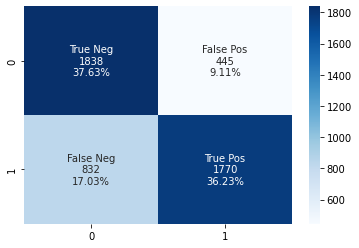

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("Confusion Matrix:")
mat=confusion_matrix(Y_test, predictions)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in mat.flatten()/np.sum(mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.69      0.81      0.74      2283
    Positive       0.80      0.68      0.73      2602

    accuracy                           0.74      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.75      0.74      0.74      4885

